# Investigatin Churn Rate for a Power Co.

In [236]:
# importing required liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px
import plotly.graph_objects as go
import pickle
%matplotlib inline
# Models Libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics

In [237]:
features = pickle.load(open('features.pickle','rb'))
final = pickle.load(open('final.pickle','rb'))
hist = pickle.load(open('hist.pickle','rb'))

In [238]:
final.head()

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000


In [240]:
features.head()

,id,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.122238,0.102864,0.073734,40.728885,24.437330,16.291555,40.851123,24.540194,16.365289
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.145218,0.000000,0.000000,44.444710,0.000000,0.000000,44.589928,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202555,0.000000,0.000000,45.944710,0.000000,0.000000,46.147265,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.115665,0.096712,0.069308,40.705612,24.423365,16.282245,40.821277,24.520077,16.351552
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146715,0.000000,0.000000,44.266930,0.000000,0.000000,44.413645,0.000000,0.000000


## StatsModel Approach....attributes significance

In [47]:
# final['cons_12m']=final['cons_12m'].fillna(final['cons_12m'].mean())
# final['cons_gas_12m']=final['cons_gas_12m'].fillna(final['cons_gas_12m'].mean())
# final['forecast_cons_12m']=final['forecast_cons_12m'].fillna(final['forecast_cons_12m'].mean())
# final['forecast_cons_year']=final['forecast_cons_year'].fillna(final['forecast_cons_year'].mean())
# final['forecast_discount_energy']=final['forecast_discount_energy'].fillna(final['forecast_discount_energy'].mean())
# final['forecast_meter_rent_12m ']=final['forecast_meter_rent_12m '].fillna(final['forecast_meter_rent_12m '].mean())
# final['forecast_price_energy_p1']=final['forecast_price_energy_p1'].fillna(final['forecast_price_energy_p1'].mean())
# final['forecast_price_energy_p2']=final['forecast_price_energy_p2'].fillna(final['forecast_price_energy_p2'].mean())
# final['forecast_price_pow_p1']=final['forecast_price_pow_p1'].fillna(final['forecast_price_pow_p1'].mean())
# final['has_gas']=final['has_gas'].fillna(final['has_gas'].mean())
# final['imp_cons']=final['imp_cons'].fillna(final['imp_cons'].mean())
# final['margin_net_pow_ele']=final['margin_net_pow_ele'].fillna(final['margin_net_pow_ele'].mean())
# final['pow_max ']=final['net_margin'].fillna(final['net_margin'].mean())
# final['net_margin']=final['net_margin'].fillna(final['net_margin'].mean())
# final['net_margin']=final['net_margin'].fillna(final['net_margin'].mean())
# final['net_margin']=final['net_margin'].fillna(final['net_margin'].mean())
# final['net_margin']=final['net_margin'].fillna(final['net_margin'].mean())

In [60]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16017
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16018 non-null  object        
 1   cons_12m                  16018 non-null  float64       
 2   cons_gas_12m              16018 non-null  float64       
 3   date_activ                16018 non-null  object        
 4   date_end                  16018 non-null  datetime64[ns]
 5   date_modif_prod           16018 non-null  object        
 6   date_renewal              16018 non-null  datetime64[ns]
 7   forecast_cons_12m         16018 non-null  float64       
 8   forecast_cons_year        16018 non-null  float64       
 9   forecast_discount_energy  16018 non-null  float64       
 10  forecast_meter_rent_12m   16018 non-null  float64       
 11  forecast_price_energy_p1  16018 non-null  float64       
 12  forecast_price_ene

In [245]:
final['intercept'] = 1

In [246]:
x = final[['intercept','pow_max','has_gas','forecast_discount_energy','imp_cons','net_margin','cons_gas_12m','cons_12m',
          'mean_price_p1','mean_price_p2','mean_price_p3','mean_price_p1_6m','mean_price_p2_6m','mean_price_p3_6m']]
y = final['churn']

In [247]:
logmod = sm.Logit(y,x)
result = logmod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.317787
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.012     
Dependent Variable:    churn              AIC:                10208.6344
Date:                  2021-12-24 21:56   BIC:                10316.1749
No. Observations:      16018              Log-Likelihood:     -5090.3   
Df Model:              13                 LL-Null:            -5150.3   
Df Residuals:          16004              LLR p-value:        2.1234e-19
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
intercept                -5.0716   0.9232 -5.4937 0.0000 -6.8810 -3.2622
pow_max                  -0.0024   0.0016 -1.4411 0.1496 -0.0056  0.0009
has_gas                  -0.1537   0.2186 -0.7034 0.4818 -0.5821  0.2746
forecast_discount_energy  0.0266   0.0945  0.2812 0.7785 -0.1586  0.2118
imp_cons                 -0.0581   0.0278 -2.0894 0.0367 -0.1126 -0.0036
net_margin                0.0004   0.0001  3.8836 0.0001  0.0002  0.0006
cons_gas_12m             -0.0318   0.0496 -0.6403 0.5220 -0.1290  0.0655
cons_12m                 -0.1363   0.0342 -3.9881 0.0001 -0.2032 -0.0693
mean_price_p1             0.0943   0.0985  0.9569 0.3386 -0.0988  0.2873
mean_price_p2             0.5271   0.2472  2.1320 0.0330  0.0425  1.0116
mean_price_p3            -0.6424   0.3863 -1.6630 0.0963 -1.3996  0.1147
mean_price_p1_6m         -0.0186   0.0890 -0.2088 0.8346 -0.1929  0.1558
mean_price_p2_6m         -0.5878   0.2463 -2.3867 0.0170 -1.0705 -0.1051
mean_price_p3_6m          0.7733   0.3839  2.0146 0.0440  0.0210  1.5256
========================================================================

"""

##### From this model we can see that cons-12m predictor is statistically significant feature to churn rate, so as net_margin
##### mean price p2&3, mean_price p3 6 m 

## Data Prep for Clustering 

In [87]:
final

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_diff,activity_a,activity_c,activity_c,activity_c,activity_f,activity_k,activity_k,activity_s,activity_s,activity_s,activity_w,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,1460.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,1096.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2566.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16013,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,3.667360,0.0,0.0,1.291591,0.138305,0.000000,44.311378,1.0,0.000000,27.88,2.0,381.77,15.000,0.0,1445.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000,0.141447,0.000000,0.000000,44.444710,0.000000,0.000000,44.586157,0.000000,0.000000,1
16014,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.801191,181.0,0.0,2.161458,0.100167,0.091892,58.995952,0.0,1.228913,0.00,1.0,90.34,6.000,1.0,1461.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235,0.104693,0.094333,0.070879,59.072030,36.428131,8.353388,59.176724,36.522465,8.424266,1
16015,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.281919,179.0,0.0,2.115943,0.116900,0.100015,40.606701,0.0,1.279895,39.84,1.0,20.38,15.935,1.0,1460.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.35385

In [248]:
pd.set_option('max_columns',None)

In [249]:
final.head()

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1


In [267]:
df_seg = final[['cons_12m','cons_gas_12m','mean_price_p1','mean_price_p2','mean_price_p3',
                'imp_cons','net_margin','pow_max','date_diff','has_gas','mean_price_p1_6m','mean_price_p2_6m',
               'mean_price_p3_6m']]
               

In [268]:
df_seg.head()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188
1,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835
2,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000
3,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000
4,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000


## standardization

In [269]:
scaler = StandardScaler()

In [270]:
df_seg_strd = scaler.fit_transform(df_seg)

In [271]:
df_seg.corr()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
cons_12m,1.000000,0.225141,-0.080405,0.251006,0.265704,0.366317,0.381465,0.225742,0.001426,0.165555,-0.083632,0.251229,0.266035
cons_gas_12m,0.225141,1.000000,-0.038696,0.058341,0.081157,0.093809,0.092359,0.051845,0.010506,0.942206,-0.039787,0.058133,0.081034
mean_price_p1,-0.080405,-0.038696,1.000000,-0.006783,-0.262031,-0.015262,0.009219,0.062618,-0.052512,-0.035246,0.998304,-0.005627,-0.260988
mean_price_p2,0.251006,0.058341,-0.006783,1.000000,0.927522,0.455465,0.308921,0.463808,0.111260,0.045739,-0.010545,0.999047,0.926716
mean_price_p3,0.265704,0.081157,-0.262031,0.927522,1.000000,0.453678,0.277785,0.386948,0.058278,0.067663,-0.263991,0.926334,0.998962
imp_cons,0.366317,0.093809,-0.015262,0.455465,0.453678,1.000000,0.342684,0.278945,0.026021,0.075829,-0.015741,0.456418,0.454864
net_margin,0.381465,0.092359,0.009219,0.308921,0.277785,0.342684,1.000000,0.466147,0.024215,0.076663,0.006714,0.308151,0.278131
pow_max,0.225742,0.051845,0.062618,0.463808,0.386948,0.278945,0.466147,1.000000,0.076162,0.035783,0.060967,0.463478,0.387129
date_diff,0.001426,0.010506,-0.052512,0.111260,0.058278,0.026021,0.024215,0.076162,1.000000,0.008489,-0.053478,0.110988,0.057912
has_gas,0.165555,0.942206,-0.035246,0.045739,0.067663,0.075829,0.076663,0.035783,0.008489,1.000000,-0.036198,0.045750,0.067764


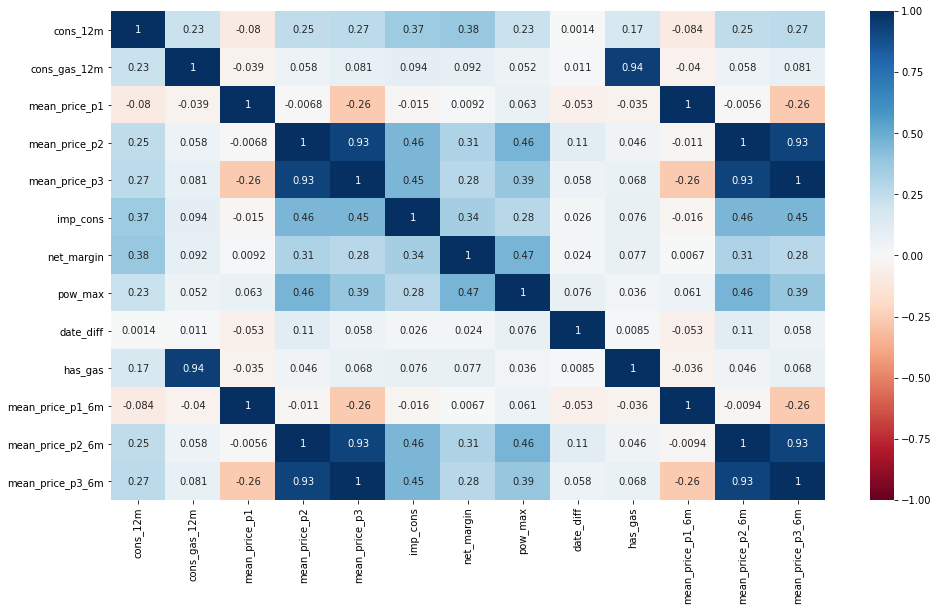

In [272]:
plt.figure(figsize=(16,9))
sns.heatmap(df_seg.corr(),vmin=-1,vmax=1,annot=True, cmap = 'RdBu');

## Hierarchial Clustering

In [273]:
hier_cluster = linkage(df_seg_strd,method='ward')

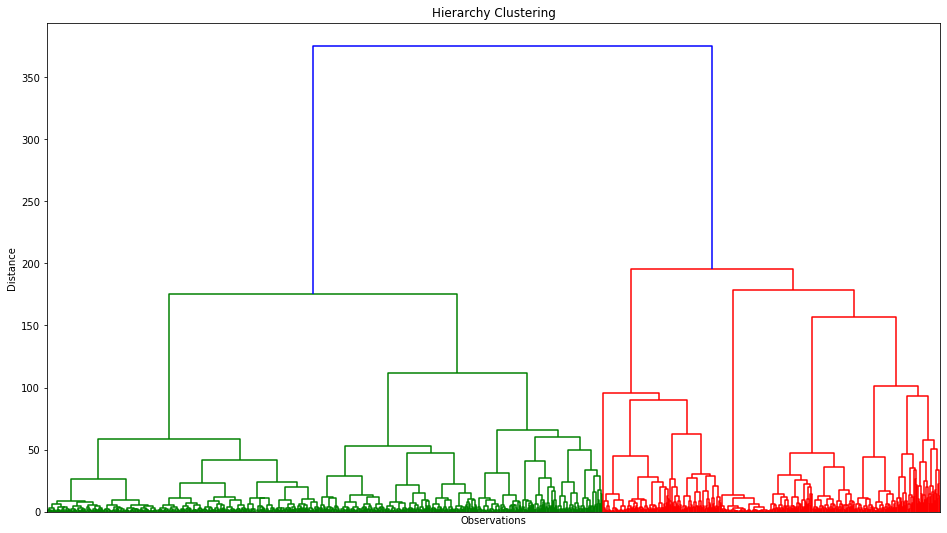

In [274]:
plt.figure(figsize=(16,9))
dendrogram(hier_cluster,show_leaf_counts = False,no_labels=True,truncate_mode='level',p=10)
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierarchy Clustering');

#### From the hierarchy clustering we can see that we have 2 clusters in the dataset but need to be confirmed by k means 

## K-Means 

In [348]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++' ,random_state = 42)
    kmeans.fit(df_seg_strd)
    wcss.append(kmeans.inertia_)

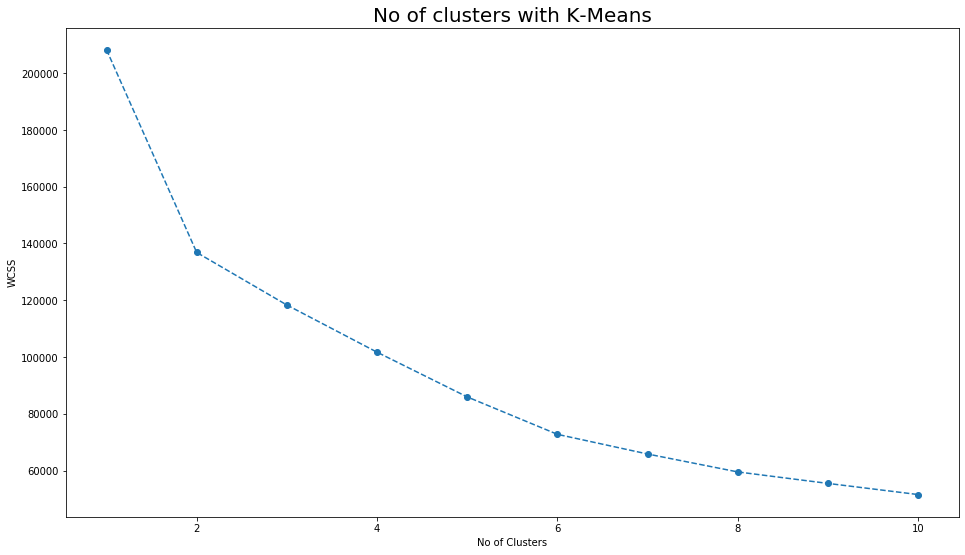

In [349]:
plt.figure(figsize=(16,9))
plt.plot(range(1,11), wcss,marker='o',linestyle='--')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('No of clusters with K-Means',fontsize=20);

In [351]:
kmeans = KMeans(n_clusters = 2, init='k-means++',random_state=42)

In [352]:
kmeans.fit(df_seg_strd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [353]:
df_kmeans_seg = df_seg.copy()

In [354]:
df_kmeans_seg['segment_kmeans'] = kmeans.labels_

In [355]:
df_kmeans_seg.head()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,segment_kmeans
0,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188,1
1,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835,1
2,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000,0
3,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000,0
4,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000,0


In [356]:
df_kmeans_analysis = df_kmeans_seg.groupby(['segment_kmeans']).mean()
df_kmeans_analysis

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
segment_kmeans,,,,,,,,,,,,,
0,4.078460,0.689541,44.079491,0.063351,0.027810,0.852263,130.412536,12.530816,1971.597540,0.163957,44.148497,0.037446,0.010794
1,4.567385,0.946193,42.647078,25.525031,15.411839,1.945826,349.554143,31.911679,2081.939262,0.210108,42.667093,25.507315,15.400479


### {0}: low Consumption,low margin,high p1 price
### {1}: high consumption, high margin, low p1 price


In [357]:
df_kmeans_analysis['No Observations'] = df_kmeans_seg[['segment_kmeans','imp_cons']].groupby(['segment_kmeans']).count()

In [358]:
df_kmeans_analysis['Proportion'] = df_kmeans_analysis['No Observations'] / df_kmeans_analysis['No Observations'].sum()

In [359]:
df_kmeans_analysis

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,No Observations,Proportion
segment_kmeans,,,,,,,,,,,,,,,
0,4.078460,0.689541,44.079491,0.063351,0.027810,0.852263,130.412536,12.530816,1971.597540,0.163957,44.148497,0.037446,0.010794,9350,0.583718
1,4.567385,0.946193,42.647078,25.525031,15.411839,1.945826,349.554143,31.911679,2081.939262,0.210108,42.667093,25.507315,15.400479,6668,0.416282


In [360]:
df_kmeans_analysis=df_kmeans_analysis.rename({0:' low Consumption,low margin,high p1 price',1:'high consumption, high margin, low p1 price'})
df_kmeans_analysis

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,No Observations,Proportion
segment_kmeans,,,,,,,,,,,,,,,
"low Consumption,low margin,high p1 price",4.078460,0.689541,44.079491,0.063351,0.027810,0.852263,130.412536,12.530816,1971.597540,0.163957,44.148497,0.037446,0.010794,9350,0.583718
"high consumption, high margin, low p1 price",4.567385,0.946193,42.647078,25.525031,15.411839,1.945826,349.554143,31.911679,2081.939262,0.210108,42.667093,25.507315,15.400479,6668,0.416282


In [361]:
df_kmeans_seg['churn'] = final['churn']

In [362]:
df_kmeans_seg.head()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,segment_kmeans,churn
0,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188,1,0.0
1,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835,1,1.0
2,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000,0,0.0
3,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000,0,0.0
4,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000,0,0.0


In [367]:
churn_to_segments = df_kmeans_seg.groupby('Labels')['churn'].sum()
churn_to_segments

Labels
high consumption, high margin, low p1 price    739.0
low Consumption,low margin,high p1 price       837.0
Name: churn, dtype: float64

In [366]:
df_kmeans_seg['Labels'] = df_kmeans_seg['segment_kmeans'].map({0:'low Consumption,low margin,high p1 price',
                                                                    1:'high consumption, high margin, low p1 price'
                                                                    })
df_kmeans_seg.head()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,segment_kmeans,churn,Labels
0,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188,1,0.0,"high consumption, high margin, low p1 price"
1,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835,1,1.0,"high consumption, high margin, low p1 price"
2,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000,0,0.0,"low Consumption,low margin,high p1 price"
3,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000,0,0.0,"low Consumption,low margin,high p1 price"
4,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000,0,0.0,"low Consumption,low margin,high p1 price"


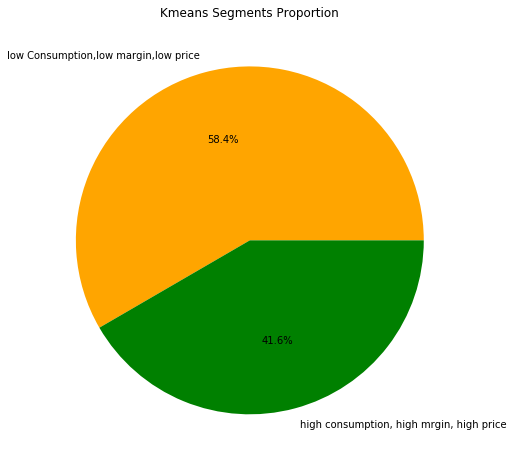

In [368]:
plt.figure(figsize=(16,8))
plt.pie(df_kmeans_analysis['Proportion'],labels = ['low Consumption,low margin,low price','high consumption, high mrgin, high price'],
       autopct='%1.1f%%',
       colors=['orange','g'])
plt.title('Kmeans Segments Proportion');

##### we can see that low consumption low net margin and low price segment is the higher portion in the dataset 

## PCA

In [369]:
pca = PCA()

In [370]:
pca.fit(df_seg_strd)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [373]:
pca.explained_variance_ratio_

array([3.64765637e-01, 1.60513783e-01, 1.52210269e-01, 9.43110191e-02,
       7.71973025e-02, 6.03978469e-02, 4.44464095e-02, 3.62627387e-02,
       5.32734266e-03, 4.28647007e-03, 1.50887199e-04, 1.27623006e-04,
       2.67110675e-06])

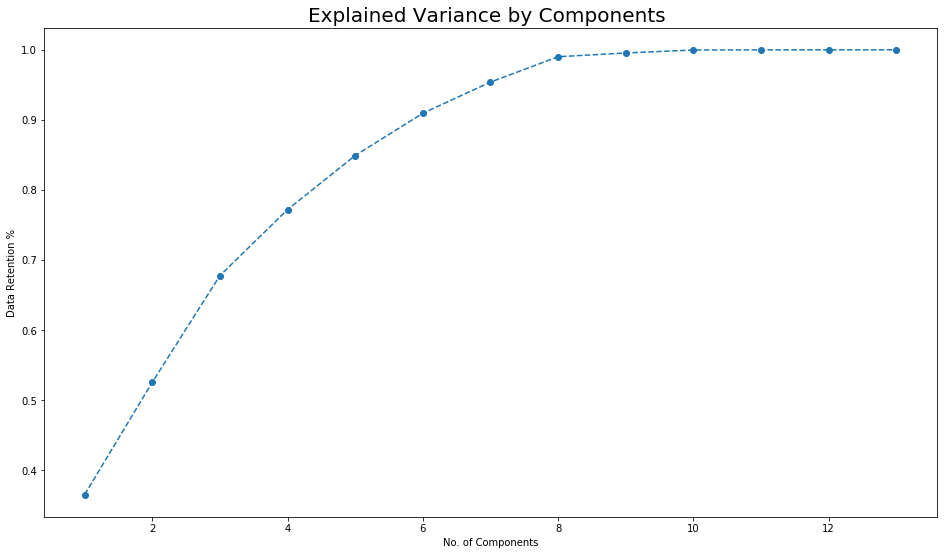

In [375]:
plt.figure(figsize=(16,9))

plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('No. of Components')
plt.ylabel('Data Retention %')
plt.title('Explained Variance by Components ',fontsize=20);

### We will use 5 components, and retain 75% of the Data

In [376]:
pca = PCA(n_components=5)
pca.fit(df_seg_strd)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [377]:
pca.components_

array([[ 0.19516449,  0.07901074, -0.08895539,  0.42961475,  0.43443211,
         0.27248467,  0.21531829,  0.25505927,  0.05047746,  0.06895571,
        -0.09041512,  0.42953419,  0.4345256 ],
       [-0.02483963, -0.17208216,  0.65056206,  0.12231636, -0.06076514,
         0.08301813,  0.11824507,  0.18646761, -0.03015835, -0.1729065 ,
         0.65014881,  0.12302896, -0.0600514 ],
       [ 0.21622437,  0.65162979,  0.15886182, -0.08081321, -0.11042883,
         0.06716125,  0.12846813,  0.04248574, -0.02741142,  0.6460858 ,
         0.15817066, -0.08066467, -0.11018407],
       [ 0.49589729, -0.17533864, -0.1283309 , -0.21685948, -0.19055237,
         0.25044847,  0.57655901,  0.28132582, -0.07833497, -0.20773789,
        -0.12894885, -0.21713681, -0.19020682],
       [-0.07184914,  0.00919781, -0.00995477, -0.00798947, -0.08133346,
        -0.09247468,  0.08646344,  0.1821168 ,  0.96528601,  0.01134339,
        -0.01075535, -0.0084697 , -0.08177931]])

In [378]:
df_pca = pd.DataFrame(data=pca.components_,columns=df_seg.columns.values,index=['compoent_1','compoent_2','compoent_3',
                                                                                'compoent_4','compoent_5'])
df_pca

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
compoent_1,0.195164,0.079011,-0.088955,0.429615,0.434432,0.272485,0.215318,0.255059,0.050477,0.068956,-0.090415,0.429534,0.434526
compoent_2,-0.024840,-0.172082,0.650562,0.122316,-0.060765,0.083018,0.118245,0.186468,-0.030158,-0.172906,0.650149,0.123029,-0.060051
compoent_3,0.216224,0.651630,0.158862,-0.080813,-0.110429,0.067161,0.128468,0.042486,-0.027411,0.646086,0.158171,-0.080665,-0.110184
compoent_4,0.495897,-0.175339,-0.128331,-0.216859,-0.190552,0.250448,0.576559,0.281326,-0.078335,-0.207738,-0.128949,-0.217137,-0.190207
compoent_5,-0.071849,0.009198,-0.009955,-0.007989,-0.081333,-0.092475,0.086463,0.182117,0.965286,0.011343,-0.010755,-0.008470,-0.081779


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

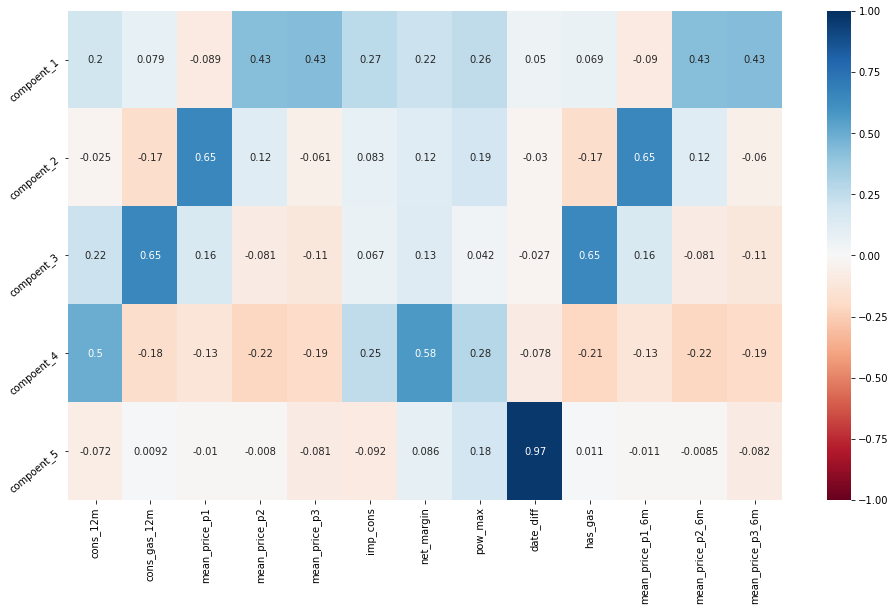

In [379]:
plt.figure(figsize=(16,9))
sns.heatmap(df_pca,vmin=-1,vmax=1,annot=True, cmap = 'RdBu')
plt.yticks(rotation=40)

#### Component 1 may represnt mean price p2 and p3 
#### Component 2 may represnt mean price p1 and mean price p1 6 month
#### Component 3 may gas consumption
#### Component 4 may represnt net margin and electricity consumption
#### Component 5 may represnt contract length 

#### Applying kmeans with PCA

In [380]:
scores_pca=pca.transform(df_seg_strd)
scores_pca

array([[ 4.72658201,  6.38373837,  1.19335665,  4.01495742,  0.47046826],
       [ 1.29950486, -0.81315847,  1.48981408, -2.95518967, -0.80520448],
       [-2.12970448,  0.06449742, -0.5591709 , -0.28816562,  1.02613267],
       ...,
       [ 1.62243404, -0.43183656, -1.51847611, -1.52341584, -1.08961924],
       [-2.59305304,  0.12987655, -0.8893124 , -1.05578818, -0.58073476],
       [-2.05907388,  0.04535319, -0.47652704, -0.05908135,  0.97952484]])

In [381]:
wcss=[]
for i in range(1,10):
    kmeans_pca =KMeans(n_clusters=i,random_state = 42,init='k-means++') 
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

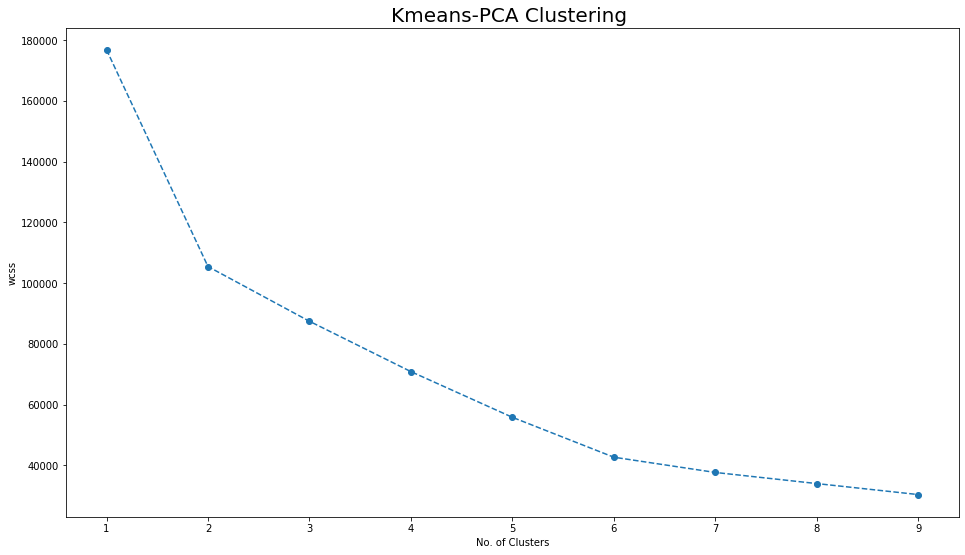

In [382]:
plt.figure(figsize=(16,9))

plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.title('Kmeans-PCA Clustering ',fontsize=20);

##### We can confirm by this chart we will use 2 clusters as figured from Hierarchial Clustering and kmeans

In [383]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [384]:
df_kmeans_pca = pd.concat([pd.DataFrame(scores_pca),df_seg.reset_index(drop=True)],axis=1)
df_kmeans_pca.columns.values[:5] = ['Compenets_1','Compenets_2','Compenets_3','Compenets_4','Compenets_5']

In [385]:
df_kmeans_pca['segment_kmeans_pca'] = kmeans_pca.labels_
df_kmeans_pca.head()

,Compenets_1,Compenets_2,Compenets_3,Compenets_4,Compenets_5,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,segment_kmeans_pca
0,4.726582,6.383738,1.193357,4.014957,0.470468,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188,1
1,1.299505,-0.813158,1.489814,-2.955190,-0.805204,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835,1
2,-2.129704,0.064497,-0.559171,-0.288166,1.026133,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000,0
3,-2.364115,0.132230,-0.762393,-0.774606,0.520756,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000,0
4,-2.266922,0.115635,-0.646711,-0.497394,0.483494,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000,0


In [386]:
df_kmeans_pca_frq=df_kmeans_pca.groupby(['segment_kmeans_pca']).mean()
df_kmeans_pca_frq

,Compenets_1,Compenets_2,Compenets_3,Compenets_4,Compenets_5,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
segment_kmeans_pca,,,,,,,,,,,,,,,,,,
0,-1.761060,-0.060482,0.159207,0.21252,0.036908,4.078460,0.689541,44.079491,0.063351,0.027810,0.852263,130.412536,12.530816,1971.597540,0.163957,44.148497,0.037446,0.010794
1,2.469393,0.084809,-0.223243,-0.29800,-0.051752,4.567385,0.946193,42.647078,25.525031,15.411839,1.945826,349.554143,31.911679,2081.939262,0.210108,42.667093,25.507315,15.400479


In [387]:
df_kmeans_pca['legend'] = df_kmeans_pca['segment_kmeans_pca'].map({0:'low Consumption,low margin,high p1 price',
                                                                    1:'high consumption, high margin, low p1 price'
                                                                    })


In [388]:
df_kmeans_pca.head()

,Compenets_1,Compenets_2,Compenets_3,Compenets_4,Compenets_5,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p2,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,has_gas,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,segment_kmeans_pca,legend
0,4.726582,6.383738,1.193357,4.014957,0.470468,5.490346,0.000000,59.059950,36.449002,8.404292,2.920541,1732.36,180.000,1460.0,0.0,59.072188,36.456718,8.406188,1,"high consumption, high margin, low p1 price"
1,1.299505,-0.813158,1.489814,-2.955190,-0.805204,0.000000,4.739944,41.067053,22.452760,14.967871,0.000000,678.99,43.648,1096.0,1.0,41.334985,21.031178,14.017835,1,"high consumption, high margin, low p1 price"
2,-2.129704,0.064497,-0.559171,-0.288166,1.026133,3.668479,0.000000,44.460984,0.007124,0.000000,0.000000,18.89,13.800,2566.0,0.0,44.491475,0.012212,0.000000,0,"low Consumption,low margin,high p1 price"
3,-2.364115,0.132230,-0.762393,-0.774606,0.520756,2.736397,0.000000,44.555962,0.088421,0.000000,0.000000,6.60,13.856,2192.0,0.0,44.613830,0.088624,0.000000,0,"low Consumption,low margin,high p1 price"
4,-2.266922,0.115635,-0.646711,-0.497394,0.483494,3.200029,0.000000,44.551475,0.000000,0.000000,0.000000,25.46,13.200,2192.0,0.0,44.594571,0.000000,0.000000,0,"low Consumption,low margin,high p1 price"


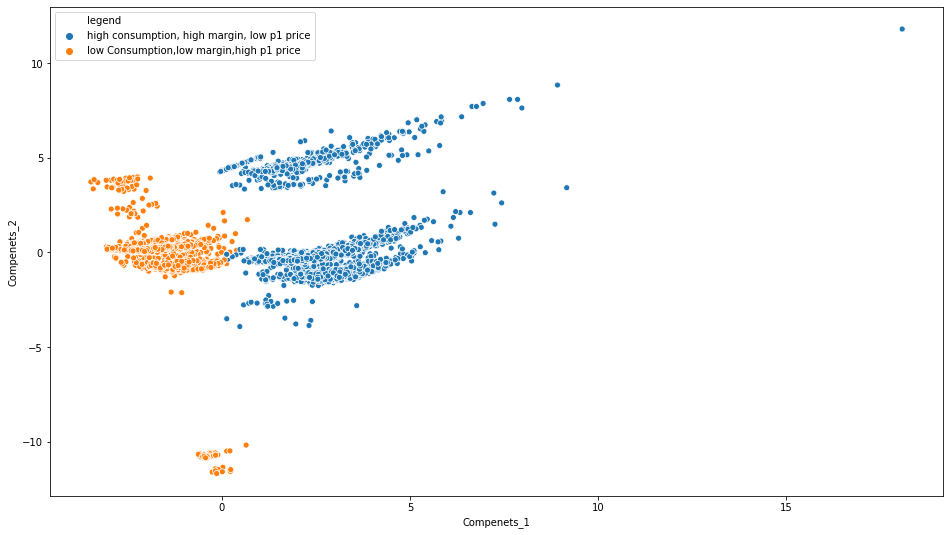

In [389]:
plt.figure(figsize=(16,9))
x = df_kmeans_pca['Compenets_1']
y = df_kmeans_pca['Compenets_2']
sns.scatterplot(x,y,hue=df_kmeans_pca['legend'])

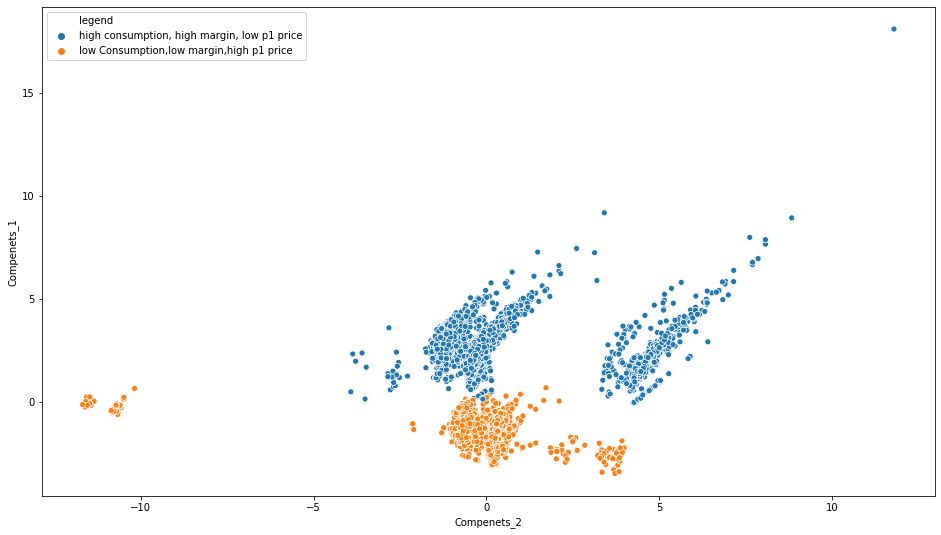

In [390]:
plt.figure(figsize=(16,9))
x = df_kmeans_pca['Compenets_2']
y = df_kmeans_pca['Compenets_1']
sns.scatterplot(x,y,hue=df_kmeans_pca['legend'])

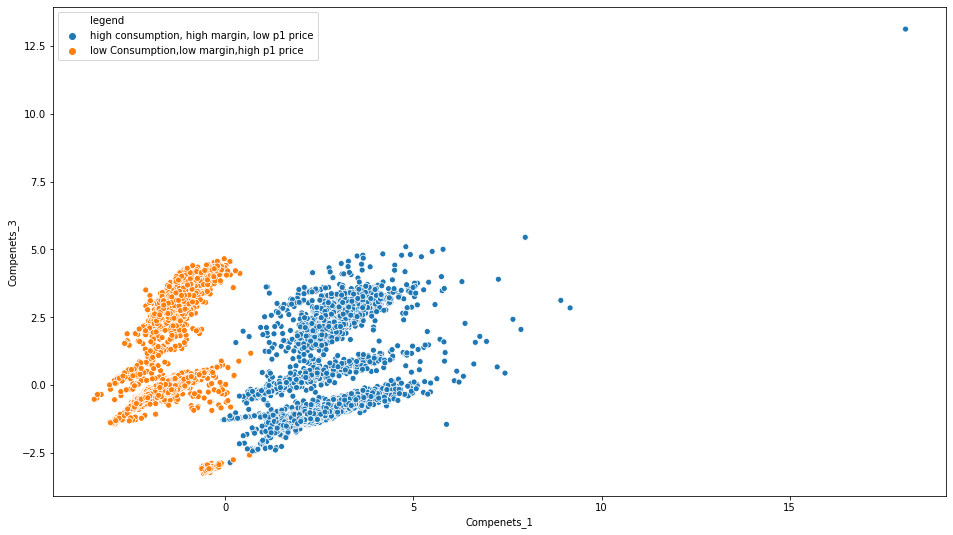

In [391]:
plt.figure(figsize=(16,9))
x = df_kmeans_pca['Compenets_1']
y = df_kmeans_pca['Compenets_3']
sns.scatterplot(x,y,hue=df_kmeans_pca['legend'])

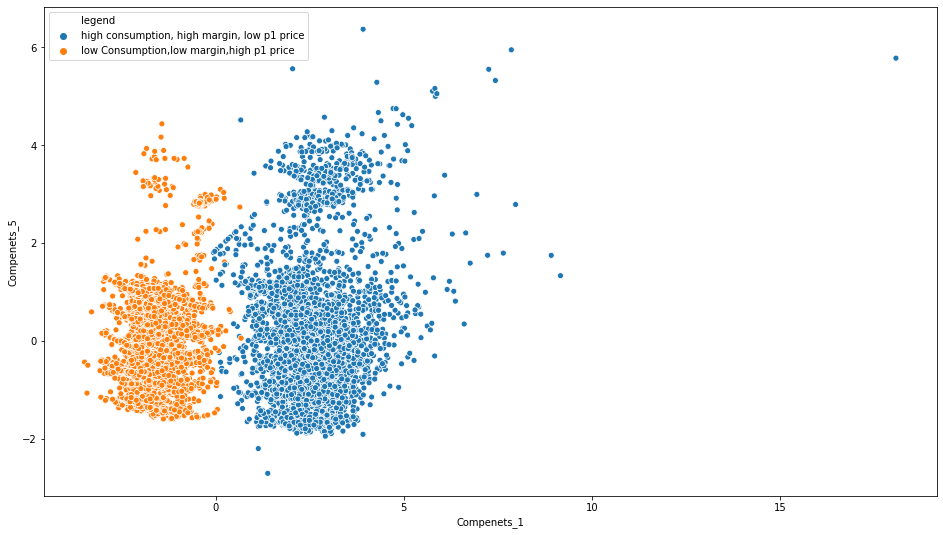

In [392]:
plt.figure(figsize=(16,9))
x = df_kmeans_pca['Compenets_1']
y = df_kmeans_pca['Compenets_5']
sns.scatterplot(x,y,hue=df_kmeans_pca['legend'])

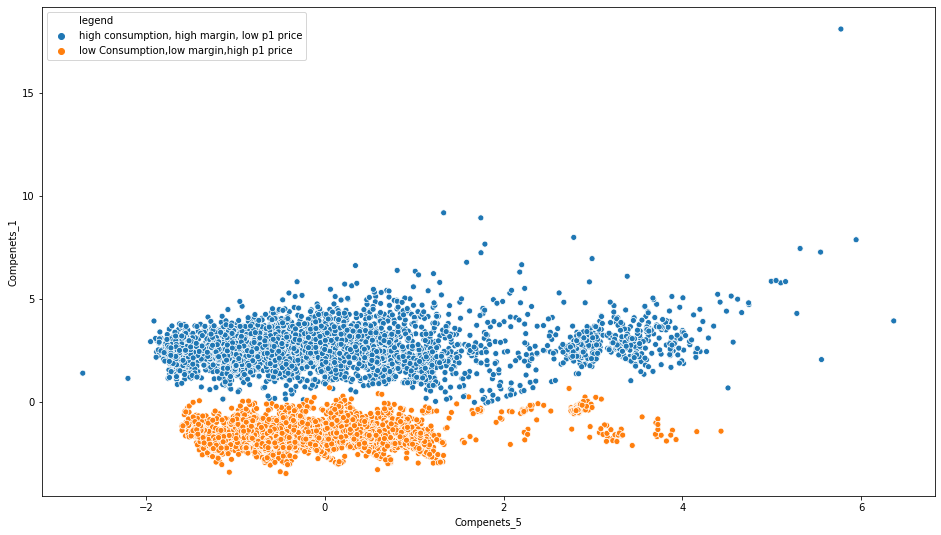

In [393]:
plt.figure(figsize=(16,9))
x = df_kmeans_pca['Compenets_5']
y = df_kmeans_pca['Compenets_1']
sns.scatterplot(x,y,hue=df_kmeans_pca['legend'])

#### Component 1 may represnt mean price p2 and p3 
#### Component 2 may represnt mean price p1 and mean price p1 6 month
#### Component 3 may gas consumption
#### Component 4 may represnt net margin and electricity consumption
#### Component 5 may represnt contract length 

##### obviuosly we can see that the clustering using components more accurate than separate attributes with norma kmeans only 
##### especially with components 1 & 5 

In [73]:
features

,id,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.122238,0.102864,0.073734,40.728885,24.437330,16.291555,40.851123,24.540194,16.365289
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.145218,0.000000,0.000000,44.444710,0.000000,0.000000,44.589928,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202555,0.000000,0.000000,45.944710,0.000000,0.000000,46.147265,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.115665,0.096712,0.069308,40.705612,24.423365,16.282245,40.821277,24.520077,16.351552
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146715,0.000000,0.000000,44.266930,0.000000,0.000000,44.413645,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,0.121161,0.101272,0.072416,40.776754,24.494510,16.353389,40.897915,24.595781,16.425804
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.145931,0.000000,0.000000,44.343121,0.000000,0.000000,44.489052,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.153731,0.128062,0.091409,41.228885,24.937330,16.791555,41.382616,25.065393,16.882965
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,0.121210,0.102121,0.073913,40.635792,24.381472,16.254314,40.757002,24.483593,16.328226


In [74]:
final

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16013,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,2012-05-24,2016-05-08,2015-05-08,2014-05-26,3.667360,0.0,0.0,1.291591,0.138305,0.000000,44.311378,1.0,0.000000,27.88,2.0,381.77,15.000,0.0,2012-05-24,1445.0,2016.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000,0.141447,0.000000,0.000000,44.444710,0.000000,0.000000,44.586157,0.000000,0.000000,1
16014,d0a6f71671571ed83b2645d23af6de00,3.858778,0

### Logistic Regression Model 

In [183]:
# defing our target value and independant values 
x = pd.DataFrame()
y = final['churn']
x['mean_price'] = (final['mean_price_p1'] +
                   final['mean_price_p2']+
                   final['mean_price_p3'] ) / 3 
                  
     

In [184]:
# splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state= 42)

In [185]:
log_mod = LogisticRegression()

In [186]:
log_mod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
log_coef = log_mod.coef_
log_coef

array([[0.0197916]])

In [188]:
log_mod.score(x_test,y_test)

0.9068664169787766

##### the positive coeffiecient indicates that there is a positive relationship between the independent variable and the dependent varialbe as the price increase the churn rate increases.

In [88]:
final[['mean_price_p1','mean_price_p2','mean_price_p3']].describe()

,mean_price_p1,mean_price_p2,mean_price_p3
count,16018.000000,16018.000000,16018.000000
mean,43.483204,10.662582,6.431900
std,5.323503,12.791473,7.752333
min,0.000000,0.000000,0.000000
25%,40.812330,0.000000,0.000000
50%,44.440261,0.086114,0.000000
75%,44.523618,24.487844,16.320402
max,59.723469,36.599861,16.911504


In [89]:
price_range=np.arange(0,18,.1)
price_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [93]:
df_price_range = pd.DataFrame(price_range)
df_price_range.head()

,0
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4


### Estimate Price Elasticity 

In [94]:
y_prob= log_mod.predict_proba(df_price_range)
y_prob

array([[0.93102341, 0.06897659],
       [0.9308962 , 0.0691038 ],
       [0.93076877, 0.06923123],
       [0.93064113, 0.06935887],
       [0.93051327, 0.06948673],
       [0.93038519, 0.06961481],
       [0.9302569 , 0.0697431 ],
       [0.93012838, 0.06987162],
       [0.92999965, 0.07000035],
       [0.92987069, 0.07012931],
       [0.92974152, 0.07025848],
       [0.92961213, 0.07038787],
       [0.92948251, 0.07051749],
       [0.92935268, 0.07064732],
       [0.92922262, 0.07077738],
       [0.92909235, 0.07090765],
       [0.92896185, 0.07103815],
       [0.92883113, 0.07116887],
       [0.92870019, 0.07129981],
       [0.92856903, 0.07143097],
       [0.92843764, 0.07156236],
       [0.92830603, 0.07169397],
       [0.9281742 , 0.0718258 ],
       [0.92804214, 0.07195786],
       [0.92790986, 0.07209014],
       [0.92777736, 0.07222264],
       [0.92764463, 0.07235537],
       [0.92751168, 0.07248832],
       [0.9273785 , 0.0726215 ],
       [0.92724509, 0.07275491],
       [0.

In [95]:
churn_prob = y_prob[:,1]

In [96]:
pe = log_coef[:,0] * price_range * (1-churn_prob)

In [97]:
df_price_elast = pd.DataFrame(price_range)
df_price_elast = df_price_elast.rename(columns={0:'price_point'})
df_price_elast['mean_elasticity'] = pe

In [98]:
pd.options.display.max_rows = None

In [99]:
df_price_elast

,price_point,mean_elasticity
0,0.0,0.000000
1,0.1,0.001842
2,0.2,0.003684
3,0.3,0.005526
4,0.4,0.007367
5,0.5,0.009207
6,0.6,0.011047
7,0.7,0.012886
8,0.8,0.014725
9,0.9,0.016563


Text(0.5, 1.0, 'Price Elasticity of Churn')

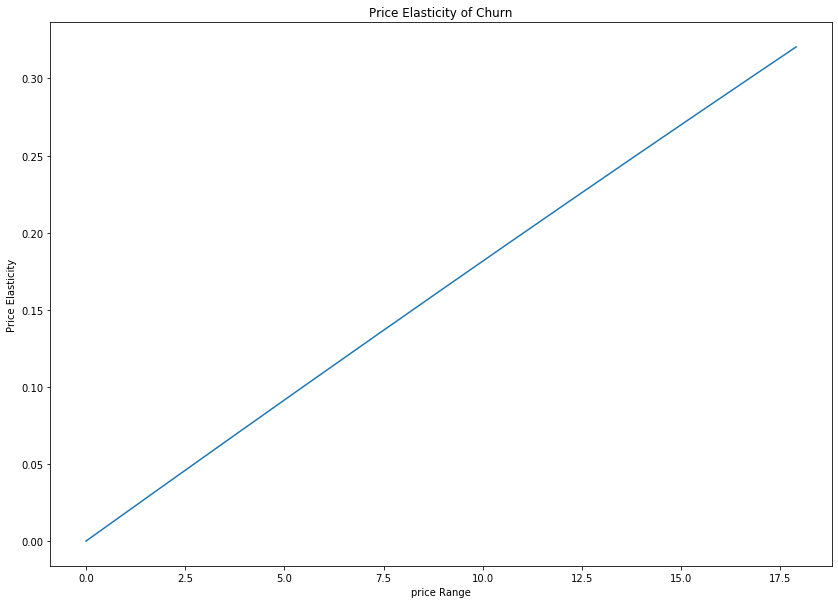

In [100]:
plt.figure(figsize=(14,10))
plt.plot(price_range,pe)
plt.xlabel('price Range')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity of Churn')

#### As shown in the above plot that the consumer most likely is price sensitive 

In [101]:
final.head()

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1


In [102]:
final_nn = final[['cons_12m','cons_gas_12m','mean_price_p1','mean_price_p3',
                'imp_cons','net_margin','pow_max','date_diff','mean_price_p1_6m',
               'mean_price_p3_6m','churn']]

In [103]:
final_nn = final_nn.astype(int)

In [104]:
final_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16017
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cons_12m          16018 non-null  int32
 1   cons_gas_12m      16018 non-null  int32
 2   mean_price_p1     16018 non-null  int32
 3   mean_price_p3     16018 non-null  int32
 4   imp_cons          16018 non-null  int32
 5   net_margin        16018 non-null  int32
 6   pow_max           16018 non-null  int32
 7   date_diff         16018 non-null  int32
 8   mean_price_p1_6m  16018 non-null  int32
 9   mean_price_p3_6m  16018 non-null  int32
 10  churn             16018 non-null  int32
dtypes: int32(11)
memory usage: 813.4 KB


In [105]:
final_nn.to_csv('final_nn.csv')

### Balancing the Dataset 

#### NN Model 

In [107]:
final_nn = np.loadtxt('final_nn.csv',delimiter=',')

In [109]:
unscaled_inputs =final_nn[:,0:-1]
unscaled_output = final_nn[:,-1]

In [110]:
unscaled_inputs.shape

(16018, 11)

In [111]:
unscaled_output.shape

(16018,)

In [112]:
churn_count = int(np.sum(unscaled_output))
churn_count

1576

In [113]:
zero_to_remove = []
zero_count = 0 
for i in range (unscaled_output.shape[0]):
    if unscaled_output[i] == 0.0:
        zero_count += 1
        if zero_count > churn_count:
            zero_to_remove.append(i)

In [114]:
inputs_equal_prior = np.delete(unscaled_inputs,zero_to_remove,axis=0)
scaled_output = np.delete(unscaled_output,zero_to_remove,axis=0) 

### Standardization 

In [115]:
scaler = StandardScaler()

In [116]:
scaled_inputs=scaler.fit_transform(inputs_equal_prior)

### Shuffling 

In [117]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_output = scaled_output[shuffled_indices]

### Splitting 

In [118]:
count_sample = shuffled_inputs.shape[0]
train_sample = int(0.8 * count_sample)
cv_sample = int(0.1*count_sample)
test_sample = count_sample - train_sample - cv_sample

### Extracting From Dataset

In [119]:
train_inputs = shuffled_inputs[:train_sample]
train_output = shuffled_output[:train_sample]

cv_inputs = shuffled_inputs[train_sample:train_sample+cv_sample]
cv_output = shuffled_output[train_sample:train_sample+cv_sample]

test_inputs = shuffled_inputs[train_sample+cv_sample:]
test_output = shuffled_output[train_sample+cv_sample:]

### balance Testing 

In [120]:
print(np.sum(train_output), train_sample, np.sum(train_output) / train_sample)
print(np.sum(cv_output), cv_sample, np.sum(cv_output) / cv_sample)
print(np.sum(test_output), test_sample, np.sum(test_output) / test_sample)

1260.0 2521 0.49980166600555337
165.0 315 0.5238095238095238
151.0 316 0.4778481012658228


##### We got almost for each set around 50% balance 

In [198]:
final_log =final [['cons_12m','cons_gas_12m','mean_price_p1','mean_price_p3',
                'imp_cons','net_margin','pow_max','date_diff','mean_price_p1_6m',
               'mean_price_p3_6m','churn']]

In [199]:
final_log.head()

,cons_12m,cons_gas_12m,mean_price_p1,mean_price_p3,imp_cons,net_margin,pow_max,date_diff,mean_price_p1_6m,mean_price_p3_6m,churn
0,5.490346,0.000000,59.059950,8.404292,2.920541,1732.36,180.000,1460.0,59.072188,8.406188,0.0
1,0.000000,4.739944,41.067053,14.967871,0.000000,678.99,43.648,1096.0,41.334985,14.017835,1.0
2,3.668479,0.000000,44.460984,0.000000,0.000000,18.89,13.800,2566.0,44.491475,0.000000,0.0
3,2.736397,0.000000,44.555962,0.000000,0.000000,6.60,13.856,2192.0,44.613830,0.000000,0.0
4,3.200029,0.000000,44.551475,0.000000,0.000000,25.46,13.200,2192.0,44.594571,0.000000,0.0


In [200]:
y1 = final_log['churn']
features = ['cons_12m','cons_gas_12m','mean_price_p1','mean_price_p3','net_margin','imp_cons','date_diff']
x1 = final_log[features]

In [202]:
# splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.25, random_state= 42)

In [203]:
log_mod = LogisticRegression(solver='sag',multi_class='multinomial')
model = log_mod.fit(x_train,y_train)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [204]:
model.score(x_test,y_test)

0.9071161048689138

### Creating The Model 

In [139]:
import tensorflow as tf 

In [151]:
hidden_layers_size = 50
output_size = 2
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layers_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layers_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')])
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
max_epochs = 50 
batch_size = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [152]:
model.fit(train_inputs,train_output,
         epochs = max_epochs,
         batch_size = batch_size,
         validation_data = (cv_inputs,cv_output),
         callbacks=[early_stopping],
         verbose = 2)

Epoch 1/50
51/51 - 0s - loss: 0.5582 - accuracy: 0.7672 - val_loss: 0.4189 - val_accuracy: 0.8730 - 427ms/epoch - 8ms/step
Epoch 2/50
51/51 - 0s - loss: 0.3396 - accuracy: 0.8842 - val_loss: 0.2743 - val_accuracy: 0.9111 - 62ms/epoch - 1ms/step
Epoch 3/50
51/51 - 0s - loss: 0.2635 - accuracy: 0.9111 - val_loss: 0.2414 - val_accuracy: 0.9143 - 64ms/epoch - 1ms/step
Epoch 4/50
51/51 - 0s - loss: 0.2407 - accuracy: 0.9199 - val_loss: 0.2250 - val_accuracy: 0.9206 - 58ms/epoch - 1ms/step
Epoch 5/50
51/51 - 0s - loss: 0.2267 - accuracy: 0.9254 - val_loss: 0.2117 - val_accuracy: 0.9333 - 64ms/epoch - 1ms/step
Epoch 6/50
51/51 - 0s - loss: 0.2221 - accuracy: 0.9250 - val_loss: 0.2093 - val_accuracy: 0.9270 - 66ms/epoch - 1ms/step
Epoch 7/50
51/51 - 0s - loss: 0.2195 - accuracy: 0.9306 - val_loss: 0.2114 - val_accuracy: 0.9270 - 66ms/epoch - 1ms/step
Epoch 8/50
51/51 - 0s - loss: 0.2170 - accuracy: 0.9286 - val_loss: 0.2084 - val_accuracy: 0.9270 - 68ms/epoch - 1ms/step
Epoch 9/50
51/51 - 0s -

##### As we can see the neural network model gives us around 93% accurace

## Testing The model 

In [170]:
loss, accuracy = model.evaluate(test_inputs,test_output)

10/10 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8987


##### After testing the model we got 90% accuracy 

In [265]:
model.predict(test_inputs).round(2)

array([[0.9 , 0.1 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.76, 0.24],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.78, 0.22],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.09, 0.91],
       [0.92, 0.08],
       [0.63, 0.37],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.48, 0.52],
       [0.85, 0.15],
       [0.91, 0.09],
       [0.9 , 0.1 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.62, 0.38],
       [0.  , 1.  ],
       [0.72, 0.28],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.84, 0.16],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.11, 0.89],
       [0.76, 0.24],
       [0.91, 0.09],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.  ,

In [266]:
model.save('Power_co_NN_Model.h5')

### XGBoost Model 

In [205]:
final.head()

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_actv,date_diff,year,month,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,2012-11-07,1460.0,2016.0,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,2013-06-15,1096.0,2016.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2009-08-21,2566.0,2016.0,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2010-04-16,2192.0,2016.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2010-03-30,2192.0,2016.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1


In [206]:
final.drop(['date_activ','date_end','date_modif_prod','date_renewal','date_actv','month'],axis=1,inplace=True)

In [207]:
final.head()

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,date_diff,year,activity_apdekpcbw,activity_ckfxocsso,activity_cluecxlam,activity_cwofmuice,activity_fmwdwsxil,activity_kkklcdamw,activity_kwuslieom,activity_null_acti,activity_sffadmsbu,activity_sfisfxfco,activity_sxublbwoe,activity_wxemiwkum,channel_ep,channel_ew,channel_fi,channel_fo,channel_lm,channel_sd,channel_us,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,mean_price_p1_var_6m,mean_price_p2_var_6m,mean_price_p3_var_6m,mean_price_p1_fix_6m,mean_price_p2_fix_6m,mean_price_p3_fix_6m,mean_price_p1_6m,mean_price_p2_6m,mean_price_p3_6m,intercept
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.423595,10025.0,0.0,2.556652,0.095919,0.088347,58.995952,0.0,2.920541,20.97,1.0,1732.36,180.000,0.0,1460.0,2016.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.101596,0.091144,0.067143,58.970593,36.365574,8.339044,59.072188,36.456718,8.406188,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.0,0.0,0.444045,0.114481,0.098142,40.606701,1.0,0.000000,25.44,2.0,678.99,43.648,1.0,1096.0,2016.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123938,0.098860,0.062955,41.211047,20.932318,13.954880,41.334985,21.031178,14.017835,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,2.280920,0.0,0.0,1.237292,0.145711,0.000000,44.311378,0.0,0.000000,16.38,1.0,18.89,13.800,0.0,2566.0,2016.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.148353,0.012212,0.000000,44.343121,0.000000,0.000000,44.491475,0.012212,0.000000,1
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,1.689841,0.0,0.0,1.599009,0.165794,0.087899,44.311378,0.0,0.000000,28.60,1.0,6.60,13.856,0.0,2192.0,2016.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.169120,0.088624,0.000000,44.444710,0.000000,0.000000,44.613830,0.088624,0.000000,1
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,2.382089,0.0,0.0,1.318689,0.146694,0.000000,44.311378,0.0,0.000000,30.22,1.0,25.46,13.200,0.0,2192.0,2016.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149861,0.000000,0.000000,44.444710,0.000000,0.000000,44.594571,0.000000,0.000000,1


In [208]:
# Splitting the data 
y = final['churn']
x = final.drop(labels=['id','churn'],axis=1)

In [209]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=18)

In [210]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimator=500,n_jobs=-1)

In [211]:
result = model.fit(x_train,y_train)

C:\Users\muham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:49:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Accuracy, Precicion Estimation 

In [212]:
prediction = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,prediction)
precision = metrics.precision_score(y_test,prediction)
recall =  metrics.recall_score(y_test,prediction)
print({'Accuracy ={0}, Precision={1}, Recall= {2} '.format(accuracy,precision,recall)})

{'Accuracy =0.903370786516854, Precision=0.7037037037037037, Recall= 0.04773869346733668 '}


##### By XGBoost we got 90% accuracy 

### ROC

In [370]:
prediction = model.predict_proba(x_test)[:,1]
prediction 

array([0.3125637 , 0.13106687, 0.0442698 , ..., 0.24074468, 0.09460584,
       0.07120624], dtype=float32)

In [372]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction)

In [374]:
score = metrics.auc(fpr,tpr)
score

0.6774679468871945

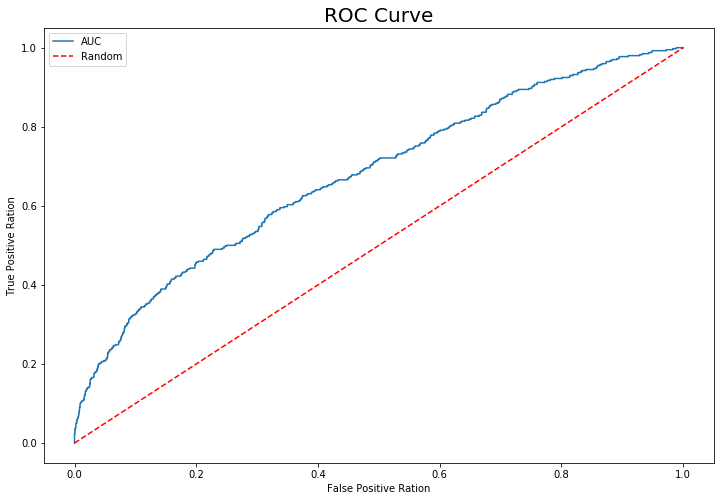

In [382]:
# Draw ROC Curve
plt.subplots(figsize=(12,8))
plt.plot(fpr,tpr,label='AUC')
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve',fontsize=20)
plt.legend()